### Image Segmentation

> Segmentation , partitions an image into regions having similar visual appearance corresponding to parts of objects

>We will try to extract the most dominant "K" colors using K means

In [2]:
#k = number to colors to represent the pictures
# first try to find colors which are most dominant


In [47]:
import cv2
import matplotlib.pyplot as plt

In [48]:
img = cv2.imread("Desktop\elephant.jpg")#reads into bgr format and matplotlib shows in rgb
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [49]:
original_shape = img.shape
print(img.shape)

(531, 944, 3)


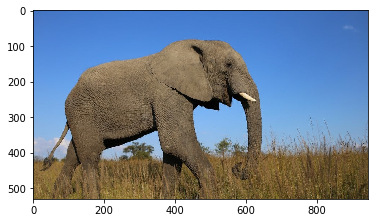

In [50]:
plt.imshow(img)
plt.show()

In [51]:
#reshape into a linear array
#flatten each channel of the image
all_pixels = img.reshape((531*944,3))
print(all_pixels.shape)

(501264, 3)


In [52]:
from sklearn.cluster import KMeans

In [53]:
dominant_colors = 4
km = KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [54]:
centers = km.cluster_centers_

In [55]:
centers

array([[ 77.55675567, 131.92849458, 208.78307538],
       [130.85855416, 110.75775046,  80.70710641],
       [129.75308287, 171.69868403, 217.36543505],
       [ 82.33836066,  65.76635882,  39.40535118]])

In [56]:
import numpy as np
centers = np.array(centers,dtype='uint8')

In [57]:
centers

array([[ 77, 131, 208],
       [130, 110,  80],
       [129, 171, 217],
       [ 82,  65,  39]], dtype=uint8)

### Plot what all colors are there

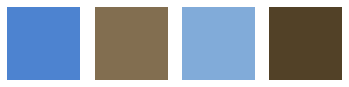

In [58]:
i = 1
plt.figure()
colors = []
for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis("off")
    i+=1
    colors.append(each_col)
    #color swatch
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
plt.show()
#these are the most dominant colors of the image

### Segmenting our original image

In [59]:
#try to match every pixel with some value
new_img = np.zeros((531*944,3),dtype='uint8')
print(new_img.shape)

(501264, 3)


In [60]:
colors

[array([ 77, 131, 208], dtype=uint8),
 array([130, 110,  80], dtype=uint8),
 array([129, 171, 217], dtype=uint8),
 array([82, 65, 39], dtype=uint8)]

In [61]:
km.labels_

array([0, 0, 0, ..., 3, 3, 3])

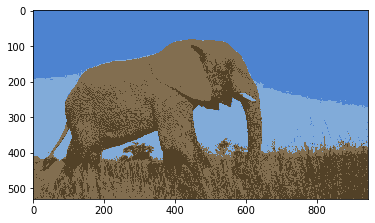

In [62]:
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]
new_img = new_img.reshape((original_shape))
plt.imshow(new_img)


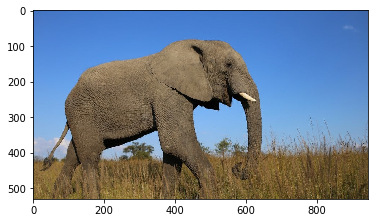

In [63]:
plt.imshow(img)